In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

In [2]:
#This is the full data frame with some extra columns removed
health_df = pd.read_csv("Resources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
health_df = health_df.drop(columns = ["Data As Of", "Start Date", "End Date", "Footnote"])
health_df.head()

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,By Total,NaN,NaN,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,962.0,75444.0,1520.0,258.0,206.0,2427.0
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0


In [3]:
#I have removed some random age groups
age_adjusted_df = health_df.loc[(health_df["Age Group"] != "40-49 years") &
                                (health_df["Age Group"] != "30-39 years") &
                                (health_df["Age Group"] != "18-29 years") &
                                (health_df["Age Group"] != "0-17 years") &
                                (health_df["Age Group"] != "50-64 years"), :]

In [4]:
#This data frame shows deaths regardless of Year and Month
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
total_df = age_adjusted_df.loc[health_df["Group"] == "By Total", :]
total_df = total_df.drop(columns = ["Year", "Month", "Group"])
total_df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
3,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0
5,United States,All Sexes,15-24 years,2592.0,81010.0,2260.0,1144.0,98.0,3798.0


In [5]:
#This data frame shows deaths by year, regardless of Month.
#You can pick 2020, 2021, or 2022
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
year_df = age_adjusted_df.loc[health_df["Group"] == "By Year", :]
year_df = year_df.drop(columns = ["Month", "Group"])
year_df.head()

,Year,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
2754,2020.0,United States,All Sexes,All Ages,385480.0,3389057.0,351879.0,179994.0,8785.0,564999.0
2755,2020.0,United States,All Sexes,Under 1 year,52.0,19608.0,241.0,9.0,21.0,305.0
2757,2020.0,United States,All Sexes,1-4 years,25.0,3527.0,132.0,4.0,61.0,214.0
2758,2020.0,United States,All Sexes,5-14 years,69.0,5639.0,172.0,12.0,76.0,305.0
2759,2020.0,United States,All Sexes,15-24 years,616.0,35961.0,773.0,223.0,80.0,1241.0


In [6]:
#This data frame shows deaths by Month.
#You can pick any month numerically (ex. January = 1.0)
#This data frame can be sorted by Year, State, Sex, and Age Group
#Year: You can pick 2020, 2021, or 2022
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
month_df = age_adjusted_df.loc[health_df["Group"] == "By Month", :]
month_df = month_df.drop(columns = "Group")
month_df.head()

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11016,2020.0,1.0,United States,All Sexes,All Ages,5.0,264658.0,17909.0,3.0,2125.0,20036.0
11017,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1781.0,41.0,0.0,8.0,49.0
11019,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
11020,2020.0,1.0,United States,All Sexes,5-14 years,0.0,471.0,21.0,0.0,29.0,50.0
11021,2020.0,1.0,United States,All Sexes,15-24 years,0.0,2596.0,57.0,0.0,28.0,85.0


In [7]:
men = year_df["Sex"] == "Men"
print(f"There are {men.count()} men in the dataframe.")
      
women = year_df["Sex"] == "Women"
print(f"There are {women.count()} women in the dataframe.")    

There are 5832 men in the dataframe.
There are 5832 women in the dataframe.


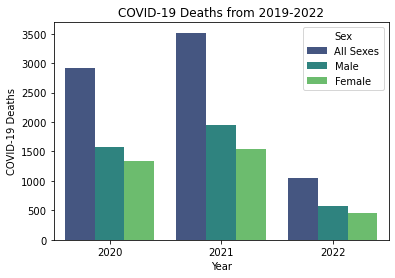

In [8]:
ax = sns.barplot(data = year_df, x="Year", y = "COVID-19 Deaths", hue = "Sex", ci=None, palette="viridis")
plt.title("COVID-19 Deaths from 2019-2022")
ax.set_xticklabels(["2020", "2021", "2022"])
plt.show()

#This plot shows that more men have died from COVID than women because
#the above line of code states there are an equal number of men and women in the dataframe.
#The most people died in 2021, but it was the only time we have an entire year's data.

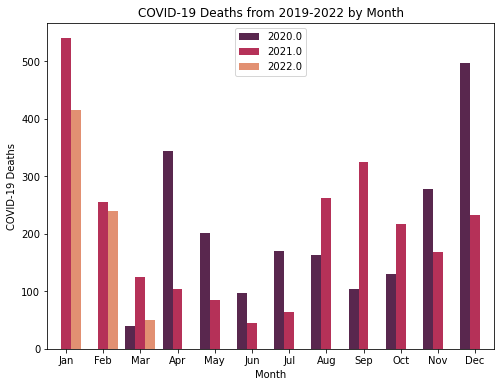

In [9]:
#The most COVID deaths occurred in Dec 2020 and Jan 2021. 
#From Feb - Jun 2021, there was a steady decline as vaccines became available.

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

f, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = month_df, x="Month", y = "COVID-19 Deaths", 
                 hue = "Year", ci=None, palette="rocket")
ax.set_xticklabels(months)
ax.set_title("COVID-19 Deaths from 2019-2022 by Month")
plt.legend(loc="upper center")
plt.show()